In [59]:
import pandas as pd
from pandas import DataFrame
import requests
import os
import os.path
import datetime as dt
import json
import numpy as np
from datetime import timedelta, datetime
from dateutil import parser
import math
%matplotlib inline
from matplotlib import pyplot as plt

from dotenv import load_dotenv
load_dotenv()

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load environment variables 
binance_api_key = os.getenv("BINANCE_API_KEY")
binance_secret_key= os.getenv("BINANCE_SECRET_KEY")


In [61]:
type(binance_api_key)

str

In [62]:
type(binance_secret_key)

str

In [63]:
# Set up client 
from binance.client import Client
binance_client = Client(api_key=binance_api_key, api_secret=binance_secret_key)

# Constants
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750

# Create collecting new data function
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('20 Aug 2020', '%d %b %Y')#<-- Can change start date here
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    return old, new

# Create function to retreive tickers and timestamps
def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2015', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

In [64]:
symbols = ['ETHUSDT', 'LINKUSDT','LTCUSDT', 'EOSUSDT']

In [65]:
thelen = len(symbols)
thelen

4

In [66]:
price_data = []
for symbol in symbols:
    prices=get_all_binance(symbol, kline_size='1m')
    prices=prices.loc[:,['close']]
    price_data.append(prices.assign(coin=symbol))

coins = pd.concat(price_data)
coins

All caught up..!
All caught up..!
All caught up..!
All caught up..!


,close,coin
timestamp,,
2020-08-20 00:00:00,408.65000000,ETHUSDT
2020-08-20 00:01:00,410.19000000,ETHUSDT
2020-08-20 00:02:00,410.66000000,ETHUSDT
2020-08-20 00:03:00,410.57000000,ETHUSDT
2020-08-20 00:04:00,411.53000000,ETHUSDT
2020-08-20 00:05:00,411.72000000,ETHUSDT
2020-08-20 00:06:00,410.77000000,ETHUSDT
2020-08-20 00:07:00,410.77000000,ETHUSDT
2020-08-20 00:08:00,411.00000000,ETHUSDT


In [68]:
coins = coins.pivot(columns='coin')

In [69]:
coins.head()

close                                        
coin                    EOSUSDT       ETHUSDT     LINKUSDT      LTCUSDT
timestamp                                                              
2020-08-20 00:00:00  3.35000000  408.65000000  16.23130000  62.20000000
2020-08-20 00:01:00  3.35910000  410.19000000  16.26730000  62.42000000
2020-08-20 00:02:00  3.35790000  410.66000000  16.27280000  62.41000000
2020-08-20 00:03:00  3.36250000  410.57000000  16.30980000  62.65000000
2020-08-20 00:04:00  3.36600000  411.53000000  16.31820000  62.76000000

In [70]:
coins.dtypes

       coin    
close  EOSUSDT     object
       ETHUSDT     object
       LINKUSDT    object
       LTCUSDT     object
dtype: object

In [71]:
coins=coins.apply(pd.to_numeric)

In [74]:
coins.to_csv('4_coins.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bcb85d0>,
      dtype=object)

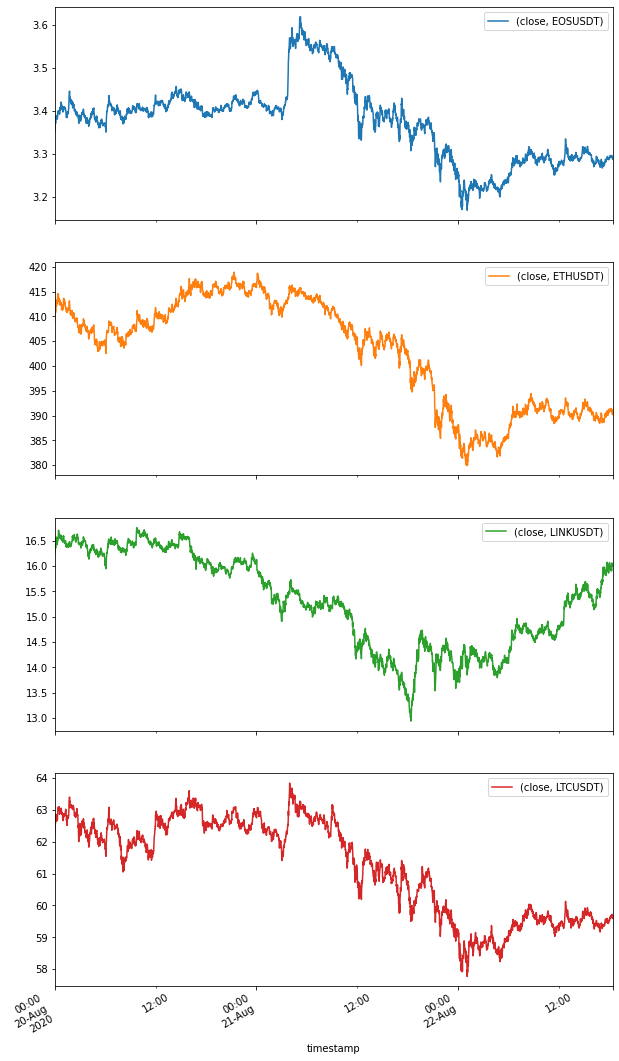

In [73]:
coins.plot(figsize=(10,20), subplots=True)

In [77]:
# Create a daily return dataframe
dcoins_coins = coins.pct_change()*100
dcoins_coins = dcoins_coins.dropna()
dcoins_coins.describe()

close                                       
coin       EOSUSDT      ETHUSDT     LINKUSDT      LTCUSDT
count  3982.000000  3982.000000  3982.000000  3982.000000
mean     -0.000381    -0.001100     0.000053    -0.000975
std       0.135340     0.096943     0.268965     0.126723
min      -0.854270    -0.638874    -1.301741    -0.572550
25%      -0.072964    -0.056310    -0.143442    -0.067033
50%      -0.002927    -0.002518    -0.004888     0.000000
75%       0.067872     0.050350     0.137750     0.064020
max       0.962145     0.753920     1.785292     0.856813

In [81]:
correlation = dcoins_coins.corr()
correlation

close                              
coin             EOSUSDT   ETHUSDT  LINKUSDT   LTCUSDT
      coin                                            
close EOSUSDT   1.000000  0.736704  0.428479  0.759040
      ETHUSDT   0.736704  1.000000  0.425078  0.710079
      LINKUSDT  0.428479  0.425078  1.000000  0.430604
      LTCUSDT   0.759040  0.710079  0.430604  1.000000

In [79]:
import seaborn as sns

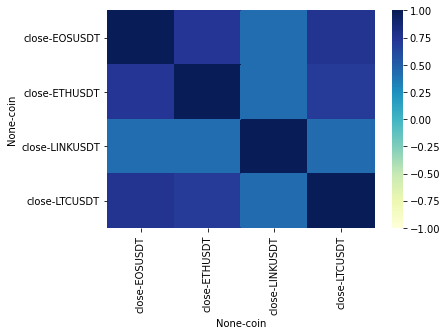

In [83]:
sns.heatmap(correlation, cmap="YlGnBu", vmin=-1, vmax=1)

# Best Pairs
    1. EOS-LTC = 0.7590
    2. ETH-EOS = 0.7367
    3. ETH-LTC = 0.71
    